### 사전 설치 라이브러리
#### - pip install opencv-python
#### - pip install opencv-contrib-python
#### - pip install pytesseract
#### - https://github.com/UB-Mannheim/tesseract/wiki 사이트에서 tesseract 다운받아 설치
#### - https://github.com/tesseract-ocr/tessdata/ 사이트에서 kor.traineddata 다운받아서
####    C:\Program Files\Tesseract-OCR\tessdata에 복사

In [121]:
import cv2
import numpy as np
import pytesseract
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
testimg3 = './testimg3.jpg'
img = cv2.imread(testimg3, cv2.IMREAD_COLOR)


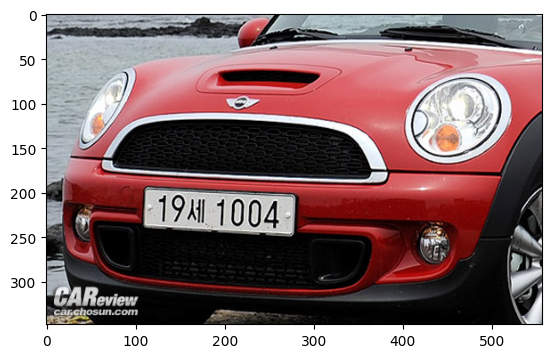

In [13]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()
cpy_img = img.copy()

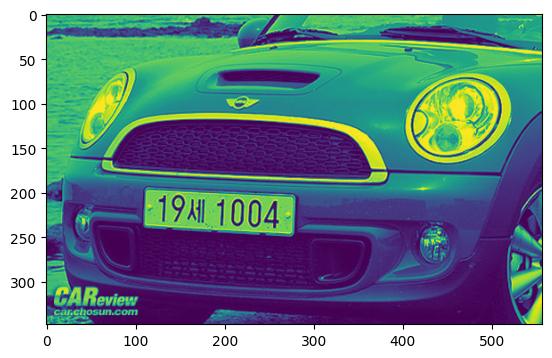

In [20]:
img2 = cv2.cvtColor(cpy_img,cv2.COLOR_BGR2GRAY)
plt.imshow(img2)
plt.show()

In [22]:
cv2.imwrite('gray.jpg',img2)

True

#### cv2.GaussianBlur(img, (ksize), sigmaX) 로 이미지의 잡음을 제거하거나 선명도를 낮추는 역할
#### - img2를 3X3크기의 커널과 표준편차 0을 사용하여 가우시안블러를 적용하며 편차가 클수록 흘릿해짐

In [27]:
blur = cv2.GaussianBlur(img2,(3,3),0)

In [30]:
cv2.imwrite('blur0.jpg',blur)

True

#### cv2.Canny(img, thresholds1,thresholds2) 이미지의 외곽선(엣지)를 추출하는 함수
#### thresholds값이 작을수록 엣지선이 많이 검출되고 크면 엣지선이 적게 검출된다

In [49]:
canny = cv2.Canny(blur,100,200)

In [45]:
cv2.imwrite('canny.jpg',canny)

True

#### cv2.findContours(img, mode, method, contours, hierachy, offset) 윤곽선을 찾는 함수
#### canny로부터 RETE_TREE방식으로 모든 컨투어(윤곽선)을 찾고 각 윤곽선의 상하구조를 계산함
#### CHAIN_APPROX_SIMPLE는 윤곽선을 더 간단히(꼭짓점만 제공) 근사화하여 메모리 공간을 줄임

In [52]:
contours, hrcy = cv2.findContours(canny, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)


In [66]:
box1 = []
f_count = 0
select = 0
plate_width = 0

In [69]:
contours[1]

array([[[ 26, 344]],

       [[ 27, 344]],

       [[ 28, 345]],

       [[ 28, 346]],

       [[ 29, 347]],

       [[ 30, 347]],

       [[ 31, 346]],

       [[ 32, 346]],

       [[ 31, 346]],

       [[ 30, 347]],

       [[ 29, 347]],

       [[ 28, 346]],

       [[ 28, 345]],

       [[ 27, 344]]], dtype=int32)

In [98]:
for i in range(len(contours)):
    cnt = contours[i]
    area = cv2.contourArea(cnt)
    x,y,w,h = cv2.boundingRect(cnt) # x좌표 y좌표 w너비 h높이 반환
    rect_area = w * h #area size
    aspect_ratio = float(w)/h # ratio = width/height
    if  (aspect_ratio>=0.2)and(aspect_ratio<=1.0)and(rect_area>=100)and(rect_area<=700): 
        cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),1)
        box1.append(cv2.boundingRect(cnt))

In [99]:
box1

[(12, 310, 8, 14),
 (535, 297, 21, 24),
 (522, 292, 13, 18),
 (41, 306, 18, 22),
 (23, 306, 17, 22),
 (522, 268, 14, 24),
 (64, 268, 10, 12),
 (442, 260, 12, 17),
 (435, 259, 6, 18),
 (29, 238, 21, 31),
 (245, 210, 17, 31),
 (245, 210, 17, 31),
 (248, 219, 8, 13),
 (227, 208, 15, 32),
 (227, 208, 15, 32),
 (230, 212, 9, 24),
 (230, 212, 9, 24),
 (192, 208, 9, 30),
 (192, 208, 9, 30),
 (168, 208, 6, 27),
 (168, 208, 6, 27),
 (159, 208, 10, 24),
 (208, 207, 15, 32),
 (208, 207, 15, 32),
 (211, 211, 9, 24),
 (211, 211, 9, 24),
 (141, 203, 15, 31),
 (141, 203, 15, 31),
 (144, 206, 10, 12),
 (144, 206, 10, 12),
 (126, 203, 9, 30),
 (126, 203, 9, 30),
 (535, 197, 22, 26),
 (500, 184, 10, 25),
 (0, 184, 20, 28),
 (57, 166, 10, 12),
 (38, 121, 13, 25),
 (49, 110, 15, 26),
 (412, 109, 16, 27),
 (460, 129, 8, 24),
 (422, 120, 19, 20),
 (429, 99, 9, 15),
 (469, 89, 13, 28),
 (491, 120, 9, 12),
 (485, 111, 18, 18),
 (287, 0, 9, 15)]

In [100]:
for i in range(len(box1)): ##Buble Sort on python
    for j in range(len(box1)-(i+1)):
        if box1[j][0] > box1[j+1][0]:
            temp = box1[j]
            box1[j] = box1[j+1]
            box1[j+1] = temp

In [102]:
box1

[(0, 184, 20, 28),
 (12, 310, 8, 14),
 (23, 306, 17, 22),
 (29, 238, 21, 31),
 (38, 121, 13, 25),
 (41, 306, 18, 22),
 (49, 110, 15, 26),
 (57, 166, 10, 12),
 (64, 268, 10, 12),
 (126, 203, 9, 30),
 (126, 203, 9, 30),
 (141, 203, 15, 31),
 (141, 203, 15, 31),
 (144, 206, 10, 12),
 (144, 206, 10, 12),
 (159, 208, 10, 24),
 (168, 208, 6, 27),
 (168, 208, 6, 27),
 (192, 208, 9, 30),
 (192, 208, 9, 30),
 (208, 207, 15, 32),
 (208, 207, 15, 32),
 (211, 211, 9, 24),
 (211, 211, 9, 24),
 (227, 208, 15, 32),
 (227, 208, 15, 32),
 (230, 212, 9, 24),
 (230, 212, 9, 24),
 (245, 210, 17, 31),
 (245, 210, 17, 31),
 (248, 219, 8, 13),
 (287, 0, 9, 15),
 (412, 109, 16, 27),
 (422, 120, 19, 20),
 (429, 99, 9, 15),
 (435, 259, 6, 18),
 (442, 260, 12, 17),
 (460, 129, 8, 24),
 (469, 89, 13, 28),
 (485, 111, 18, 18),
 (491, 120, 9, 12),
 (500, 184, 10, 25),
 (522, 292, 13, 18),
 (522, 268, 14, 24),
 (535, 297, 21, 24),
 (535, 197, 22, 26)]

In [109]:
for m in range(len(box1)):
    count=0
    for n in range(m+1,(len(box1)-1)):
        delta_x=abs(box1[n+1][0]-box1[m][0])
        if delta_x > 150:
            break
        delta_y =abs(box1[n+1][1]-box1[m][1])
        if delta_x ==0:
            delta_x=1
        if delta_y ==0:
            delta_y=1           
        gradient =float(delta_y) /float(delta_x)
        if gradient<0.25:
            count=count+1
   #measure number plate size         
    if count > f_count:
        select = m
        f_count = count;
        plate_width=delta_x
cv2.imwrite('snake.jpg',img)

True

In [123]:
# cpy_img 이미지에서 box1[select] 영역의 좌측 상단 점을 기준으로 x축으로 -10만큼, 
# y축으로 -10만큼 이동한 지점부터 x축으로 140만큼, 
# y축으로 box1[select] 영역의 높이에 20을 더한 지점까지의 사각형 영역을 잘라내어 number_plate 변수에 저장
# 즉, box1[select] 영역 내에 있는 차량 번호판 영역을 추출하여 number_plate 변수에 저장 
number_plate = cpy_img[box1[select][1]-10:box1[select][3]+box1[select][1]+20,box1[select][0]-10:140+box1[select][0]] 

# resize_plate = cv2.resize(number_plate, None, fx=1.8, fy=1.8, interpolation=cv2.INTER_CUBIC+cv2.INTER_LINEAR) 코드는 
# number_plate 이미지를 가로, 세로 축으로 각각 1.8배씩 확대하여 resize_plate 변수에 저장 
# 이때, interpolation 매개변수는 이미지 크기를 조정할 때 사용하는 보간법(interpolation)을 지정
# cv2.INTER_CUBIC+cv2.INTER_LINEAR은 양선형 보간법(Bilinear Interpolation)과 삼선형 보간법(Bicubic Interpolation)을 함께 사용
resize_plate = cv2.resize(number_plate,None,fx=1.8,fy=1.8,interpolation=cv2.INTER_CUBIC+cv2.INTER_LINEAR) 

plate_gray = cv2.cvtColor(resize_plate,cv2.COLOR_BGR2GRAY)

# ret, th_plate = cv2.threshold(plate_gray, 150, 255, cv2.THRESH_BINARY) 코드는 plate_gray 이미지에서 임계값 150을 
# 기준으로 이진화하여 th_plate 변수에 저장
# 이때, ret 변수는 사용된 임계값을 반환 
# 이진화 방법으로 cv2.THRESH_BINARY를 사용했기 때문에, 임계값보다 작은 픽셀은 0으로, 임계값보다 큰 픽셀은 maxval인 255로 설정
# 즉, 결과적으로 th_plate 이미지는 검은색과 흰색으로 이루어진 이진 이미지가 됨
ret,th_plate = cv2.threshold(plate_gray,150,255,cv2.THRESH_BINARY)
          
cv2.imwrite('plate_th.jpg',th_plate)

# kernel = np.ones((3,3), np.uint8) 코드는 3x3 크기의 모든 요소가 1인 구조화 요소를 생성하여 kernel 변수에 저장
# 이후, er_plate = cv2.erode(th_plate, kernel, iterations=1) 코드는 th_plate 이미지에 kernel 구조화 요소를 이용하여 
# 침식 연산을 수행하고, 결과 이미지를 er_plate 변수에 저장
# 이때, iterations 매개변수는 침식 연산을 반복할 횟수를 지정합니다.
kernel = np.ones((3,3),np.uint8)
er_plate = cv2.erode(th_plate,kernel,iterations=1)
er_invplate = er_plate
cv2.imwrite('er_plate.jpg',er_invplate)

# result = pytesseract.image_to_string(Image.open('er_plate.jpg'), lang='kor') 코드는 'er_plate.jpg' 파일에서 
# 한글 문자를 인식하여 result 변수에 저장
# 이때, Image.open() 함수는 이미지 파일을 열어서 Image 객체로 반환하는 함수입니다. 
# lang 매개변수는 한글 문자를 인식하기 위해 'kor'로 지정
## result = pytesseract.image_to_string(Image.open('./er_plate.jpg'), lang='kor')
# print(result.replace(" ",""))

True

In [124]:
pytesseract.pytesseract.tesseract_cmd = r'C:\\Program Files\\Tesseract-OCR\\tesseract'
config = ('-l kor+eng --oem 3 --psm 11')

In [125]:
text = pytesseract.image_to_string('./er_plate.jpg', config=config)
print('==========텍스트 인식 결과==========')
print(text)

==========텍스트 인식 결과==========
1944 1004



In [131]:
result = pytesseract.image_to_string('./er_plate.jpg', lang='kor')

In [133]:
print(result)

1? 세 1004



In [134]:
# 이미지 로드
img = cv2.imread('./er_plate.jpg')

# 이미지 이진화
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# 이미지 팽창 및 침식
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
dilation = cv2.dilate(thresh, kernel, iterations=1)
erosion = cv2.erode(dilation, kernel, iterations=1)

# 이미지 가우시안 블러
blur = cv2.GaussianBlur(erosion, (5, 5), 0)

# 문자 인식
result2 = pytesseract.image_to_string(blur, lang='kor')
print(result2)

1? 세 1004

